<a href="https://colab.research.google.com/github/cristobalperezp/Data-Science-training/blob/main/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>CLUSTERING</center></h1>

In [ ]:
import zipfile	
import os

!wget --no-check-certificate \
    "https://github.com/cristobalperezp/Data-Science-training/archive/refs/heads/main.zip" \
    -O "main.zip"
	
zip_ref = zipfile.ZipFile('main.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()


In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# scaler
scaler = MinMaxScaler()
# transformar la data
DATA = scaler.fit_transform(DATOS)
DATA

In [ ]:
#KMEANS
from sklearn.cluster import KMeans    #importar método para hacer KMeans
import matplotlib.pyplot as plt       #para graficar
import numpy as np                    #numpy para manejo de arreglos

# Plotly library
import plotly.express as px           #librerias necesarias para usar plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff

random_state = 12345                  #Se fija aletoreidad necesaria

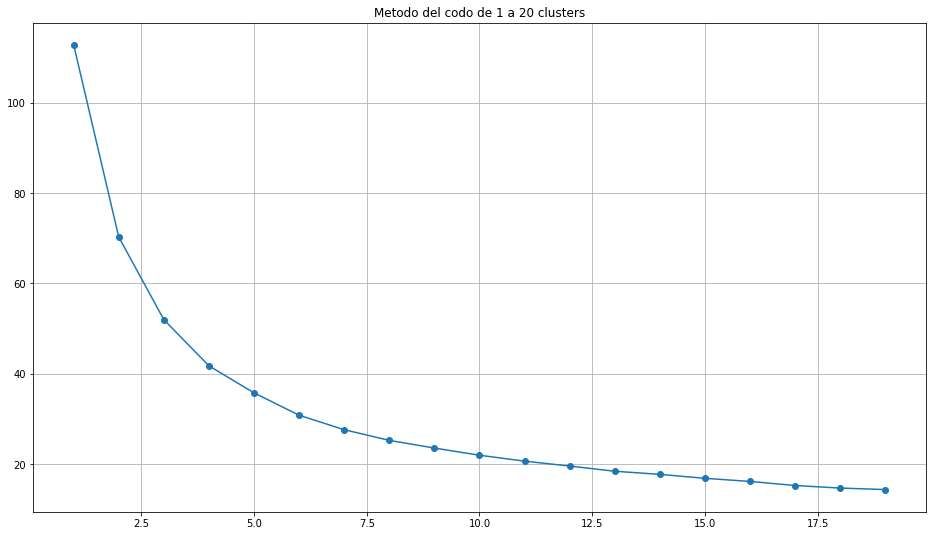

In [ ]:
sse = []

clusters = list(range(1, 20))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(DATA)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(16,9))
plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 20 clusters")
plt.grid(True)
plt.show()

In [ ]:
#CON EL MÉTODO DEL CODO, SE IDENTIFICA UN "CODO" EN 4 CLUSTERS, YA QUE ESISTE UN CAMBIO CONSIDERABLE EN LA PENDIENTE DE LA RECTA.
#NOTANDO QUE LAS GANANCIAS EN TÉRMINOS DE SSE POR UN CLUSTER MÁS(5), ES MENOR EN COMPARACIÓN A 4.

In [ ]:
#UTILIZAMOS KMEANS CON K CLUSTERS
kmeans = KMeans(n_clusters=CLUSTERS, n_init=100, max_iter=500, random_state=random_state)
kmeans.fit(DATA)
#GUARDAMOS LAS PREDICCIONES
y_pred = kmeans.predict(DATA)                                                        

In [ ]:
#CREAMOS UNA COPIA DE BANK, DÓNDE GUARDAREMOS LAS ETIQUETAS DEL CLUSTERING
DATA_clust=DATA.copy()
DATA_clust['labels_kmeans'] = kmeans.labels_

In [ ]:
#DIVIDIMOS EL DATASET, PARA LUEGO REDUCIR LA DIMENSIONALIDAD Y PODER VISUALIZAR EN 2D LOS CLUSTERS FORMADOS
X=DATA_clust.iloc[:,0:largo].values
Y=DATA_clust.iloc[:,largo].values

In [ ]:
from sklearn.decomposition import PCA
#CREAR EL OBJETO PCA
pca = PCA(n_components=2)
#AJUSTARLO A LOS DATOS
principalComponents = pca.fit_transform(X)

#DATAFRAME CON LAS PC
df_pca = pd.DataFrame(data = principalComponents, columns = ['c1', 'c2'])
#INCLUIMOS LAS ETIQUETAS DE KMEANS
df_pca['labels_kmeans']=y

df_pca.head()

In [ ]:
#GRAFICAMOS EN 2D
plt.figure(figsize=(16,9))
plt.scatter(df_pca['c1'], df_pca['c2'],c=kmeans.labels_)
plt.title("Método PCA: Gráfico de clusters")
plt.show()

In [ ]:
#TRAS APLICAR EL MÉTODO DE CLUSTERING KMEANS A LA BASE DE DATOS, SE LLEVARON LOS RESULTADOS A UN DATAFRAME DE DIMENSIONALIDAD 2 PARA PODER VISUALIZAR
#LOS GRUPOS OBTENIDOS, EN DÓNDE POR EL MÉTODO DE PCA, SÓLO ES POSIBLE DECIR QUE SE ENCONTRARON 4 CATEGORÍAS DE CLIENTES AGRUPADOS POR SIMILITUDES EN
#EDAD, INGRESOS, DEUDA POR CONSUMO, DEUDA POR CRÉDITO Y OTRAS DEUDAS.

In [ ]:
#CLUSTERING AGLOMERATIVO JERÁRQUICO
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
#4 MODELOS DE CLUSTERING JERÁRQUICO
complete = linkage(X, method="complete", metric="euclidean", optimal_ordering=False)
single = linkage(X, method="single", metric="euclidean", optimal_ordering=False)
average = linkage(X, method="average", metric="euclidean", optimal_ordering=False)
ward = linkage(X, method="ward", metric="euclidean", optimal_ordering= False)

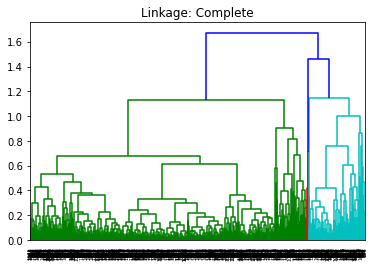

In [ ]:
#COMPLETE
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

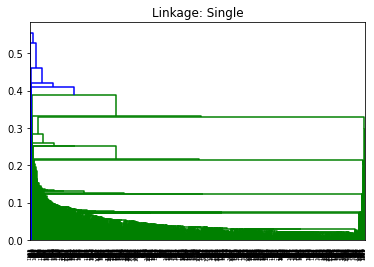

In [ ]:
#SINGLE
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

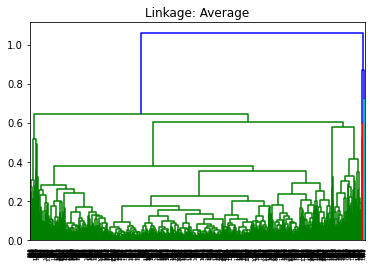

In [ ]:
#AVERAGE
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

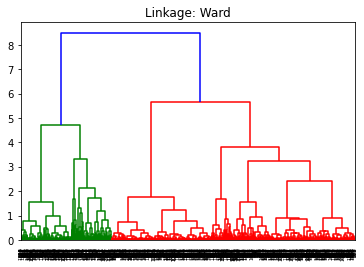

In [ ]:
#WARD
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

In [ ]:
#POR VISUALIZACIÓN, SE PREFIERE UTILIZAR WARD PARA APLICAR EL CLUSTERING CON EL TOTAL DE 4 CLUSTERS QUE SE DECIDIERON CON KMEANS
ac = AgglomerativeClustering(n_clusters=CLUSTERS,
                             linkage="ward",
                             distance_threshold=None)
ac.fit(X)

In [ ]:
#SE AGREGAN LAS ETIQUETAS DEL CLUSTERING JERÁRQUICO ALGOMERATIVO
DATA_clust['labels_aglo'] = ac.labels_
#DE IGUAL FORMA AL MODELO REDUCIDO EN 2D PARA GRAFICAR Y VER COMPARACIONES
df_pca['labels_aglo']=ac.labels_

In [ ]:
import matplotlib.pyplot as plt 
#GRAFICAMOS CON LAS ETIQUETAS DEL CLUSTERING JERÁRQUICO
plt.figure(figsize=(16,9))
plt.scatter(df_pca['c1'], df_pca['c2'],c=ac.labels_)
plt.title("Método PCA: Gráfico de clusters")
plt.show()

In [ ]:
#NOTAMOS QUE HAY UNA SIMILITUD EN CUANTO A LA UBICACIÓN DE LOS CLUSTERS ENCONTRADOS, DESTACANDO ADEMÁS UN MAYOR SOLAPAMIENTO DE LOS CLUSTERS QUE SE VISUALIZA EN 
#ESTE ÚLTIMO GRÁFICO, PERO SE CONCLUYE DE IGUAL MANERA QUE CON KMEANS QUE SE ENCONTRARON 4 CLUSTERS DE CLIENTES AGRUPADOS POR LOS MISMOS ATRIBUTOS Y QUE COMPARTEN 
#SIMILITUDES EN ESTAS.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

In [ ]:
import matplotlib.pyplot as plt 
#GRAFICAMOS CON LAS ETIQUETAS DEL CLUSTERING DBSCAN
plt.figure(figsize=(16,9))
plt.scatter(df_pca['c1'], df_pca['c2'],c=dbscan.labels_)
plt.title(f"PDCA #### DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

In [ ]:
#SE AGREGAN LAS ETIQUETAS DEL CLUSTERING DBSCAN
DATA_clust['labels_dbs'] = dbscan.labels_
#DE IGUAL FORMA AL MODELO REDUCIDO EN 2D PARA GRAFICAR Y VER COMPARACIONES
df_pca['labels_dbs']=dbscan.labels_

In [ ]:
#VERIFICACIÓN DE SOLAPAMIENTO
from sklearn.metrics import silhouette_score
print("Dataset X K-Means\t", silhouette_score(X, kmeans.labels_))
print("Dataset X Ward Agg\t", silhouette_score(X, ac.labels_))
# para DBSCAN tenermos que filtrar las labels negativas, ya que representan ruido, no otro cluster
_filter_label = dbscan.labels_ >= 0
print("Dataset X DBSCAN\t", silhouette_score(X[_filter_label], dbscan.labels_[_filter_label]))

In [ ]:
DATA2=X.copy()
DATA2['labels_kmeans']=DATA_clust['labels_kmeans']
DATA2['labels_aglo']=DATA_clust['labels_aglo']
DATA2['labels_dbs']=DATA_clust['labels_dbs']
DATA2

**Bonus**
#### Interpretar resultados (1.0 Puntos)

In [ ]:
DATA2.groupby(by='labels_kmeans').mean()

,costumer_id,age,yrs_work,yrs_address,income,income_debt,credit_debt,other_debt,debt,ratio_debt,address_work,age_norm,income_norm,yrs_work_norm,yrs_address_norm,income_debt_norm,credit_debt_norm,other_debt_norm,debt_norm,ratio_debt_norm,labels_aglo
labels_kmeans,,,,,,,,,,,,,,,,,,,,,
0,231133.909091,30.380165,4.880165,4.454545,48.318182,19.904132,3.169835,6.377934,29.451901,0.740930,0.190083,0.202954,0.034038,0.077463,0.131016,0.487787,0.087871,0.100346,0.267529,0.350258,0.028926
1,227782.088847,24.705104,2.158790,2.366730,34.720227,7.097353,0.802268,1.625917,9.525539,0.321206,0.319471,0.109920,0.021294,0.034267,0.069610,0.172349,0.022032,0.025464,0.085786,0.150925,1.332703
2,219282.472441,60.456693,22.811024,17.409449,156.401575,13.024409,5.736614,11.834882,30.595906,0.297791,0.023622,0.696011,0.135334,0.362080,0.512043,0.318335,0.159250,0.186336,0.277963,0.139804,0.984252
3,206603.631757,43.716216,10.847973,10.425676,74.375000,6.625338,1.603784,3.073547,11.302669,0.193614,0.047297,0.421577,0.058458,0.172190,0.306638,0.160723,0.044321,0.048275,0.101994,0.090329,1.905405


**Respuesta:**\
Tras realizar el clsutering a la base de datos, se encontró que:

*   **Cluster 1** (label 1): corresponde a los clientes de menor edad, con menor experiencia laboral y menores ingresos, con una deuda total menor, pero que presentan un ratio de deuda (deuda total/ingresos) mayor que el cluster 2.
*   **Cluster 2** (label 0): este grupo de clientes, se encuentra en promedio en los 30 años, y cuentan con una experiencia laboral mayor al grupo anterior, al igual que sus ingresos, pero mantienen una deuda total total casi tan alta como el grupo de mayor edad, hecho que se traduce en que son el grupo con un mayor ratio de deuda.
*   **Cluster 3** (label 3): corresponde al grupo de clientes que rondan los 40 años, cuya experiencia labroal duplica a la del grupo anterior, y en promedio, ganan 25 mil dolares más que el segundo grupo, por otro lado sus deudas totales son menores que este segundo grupo y su ratio de deuda es el menor etre los 4 clusters.
*   **Cluster 4** (label 4): este grupo es el de mayor edad y por cosiguiente una mayor experiencia laboral, sus ingresos promedio rondan los 150 mil dólares, pero son el grupo con mayor deuda total, no así, debido a sus ingresos, el ratio de deuda es el 2do menor entre los cuatro clusters encontrados.

Se concluye que del clustering, se encontraron grupos que mantienen relación lógica entre sus características y atributos, y que caracterizan de buena manera sus similitudes y diferencias con los otros grupos.

